<h1 align="center">Mathematical Methods In Engineering - 25872</h1>
<h3 align="center">Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Fall 2023</h4>
<h4 align="center">Python Assignment</h4>
<h5 align="center"><font color="cyan"> Feel free to contact TA team for any possible questions about the assignment </font>
 </h5>
<h5 align="center"> <font color="cyan"> Questions 1,2: @Ilia_ad7  -  Question 3: @MhShafieizadegan </font> </h5>

You should write your code in the <font color='green'>Code Cell</font> and then run the <font color='green'>Evaluation Cell</font> to check the correctness of your code.<br>
<font color='red'>**Please do not edit the codes in the Evaluation Cells.**</font>

## 1. Prediction with Least Squares
* Fit a polynomial of degree $K$ to all columns of the following dataset
to predict number of "Cars" and "Buses" in the years of $2016$,$2017$,$2018$,$2019$ and $2020$.


$$
y_i = \sum_{k=0}^K w_k x_{i}^k + \epsilon_i
$$


Change the value of $K$ from 3 to 5. For each degree, plot the data and your model fit and compare the results.

``(25 pt.)``

In [1]:
# import required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

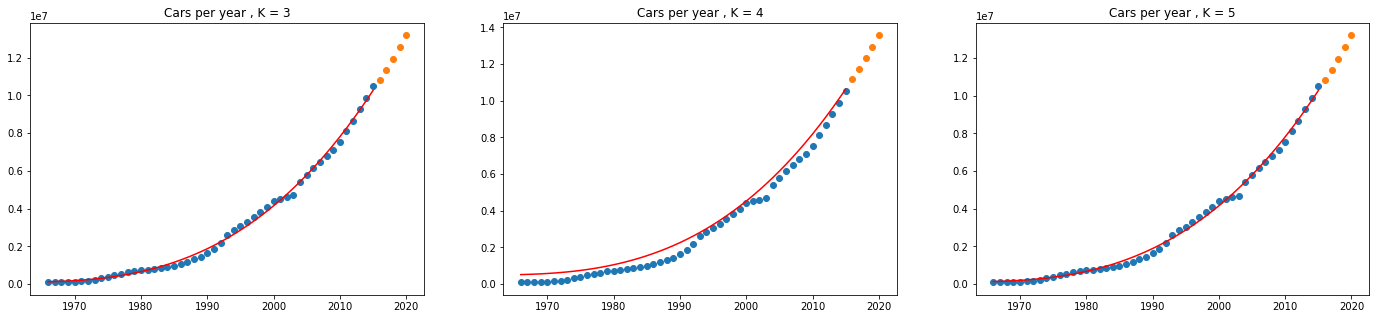

<Figure size 432x288 with 0 Axes>

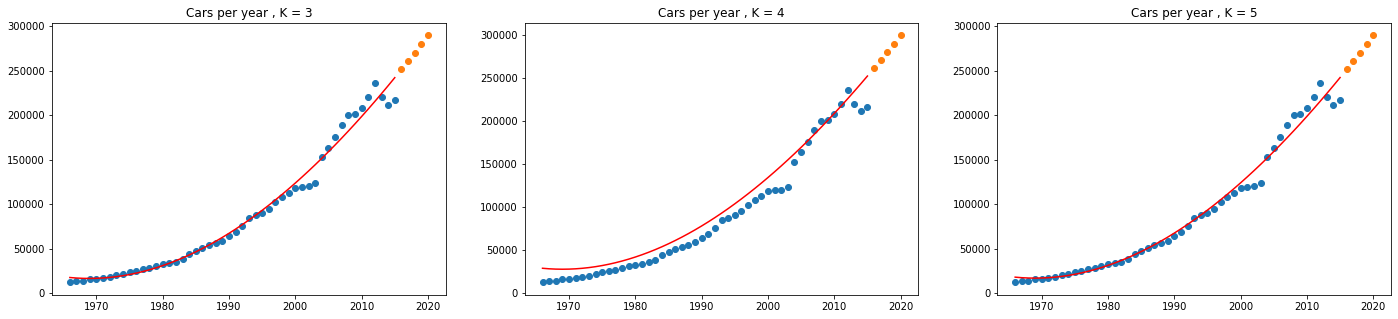

<Figure size 432x288 with 0 Axes>

In [96]:
# Code cell

def PredictAndPlot(data, K, type):

    x = np.zeros((50, K+1))
    y = np.zeros((50, 1))
    for i in range(50):
        for j in range(K+1):
            x[i,j] = ( data['Year'][i] ** (j) )
    for i in range(50):
            if type == 'Car':
                y[i,0] = ( data['Car'][i] )
            elif type == 'Bus':
                y[i,0] = ( data['Bus'][i] )
    X = np.array(x)
    Yreal = np.array(y)
    vector = (np.linalg.inv(np.transpose(X) @ X) @ np.transpose(X)) @ Yreal
    Yfit = X @ vector

    xprd = np.zeros((5, K+1))
    for i in range(5):
        for j in range(K+1):
            xprd[i,j] = ( (2016 + i) ** (j) )
    Xprd = np.array(xprd)
    Yprd = Xprd @ vector

    return Yprd,Yfit,Yreal


filename = 'arac.csv'
df = pd.read_csv(filename, delimiter=';')
data = df.to_dict()

x = np.zeros(50)
for i in range(50):
     x[i] = ( data['Year'][i])

xprd = [2016,2017,2018,2019,2020]

yprd3,yf3,y = PredictAndPlot(data,3,'Car')
yprd4,yf4,y = PredictAndPlot(data,4,'Car')
yprd5,yf5,y = PredictAndPlot(data,5,'Car')

plt.figure(figsize=(24,5))

plt.subplot(1,3,1)
plt.scatter(x,y)
plt.scatter(xprd,yprd3)
plt.plot(x,yf3, color='red')
plt.title("Cars per year , K = 3")

plt.subplot(1,3,2)
plt.scatter(x,y)
plt.scatter(xprd,yprd4)
plt.plot(x,yf4, color='red')
plt.title("Cars per year , K = 4")

plt.subplot(1,3,3)
plt.scatter(x,y)
plt.scatter(xprd,yprd5)
plt.plot(x,yf5 , color='red')
plt.title("Cars per year , K = 5")

plt.show()

plt.tight_layout()

yprd3,yf3,y = PredictAndPlot(data,3,'Bus')
yprd4,yf4,y = PredictAndPlot(data,4,'Bus')
yprd5,yf5,y = PredictAndPlot(data,5,'Bus')

plt.figure(figsize=(24,5))

plt.subplot(1,3,1)
plt.scatter(x,y)
plt.scatter(xprd,yprd3)
plt.plot(x,yf3, color='red')
plt.title("Cars per year , K = 3")

plt.subplot(1,3,2)
plt.scatter(x,y)
plt.scatter(xprd,yprd4)
plt.plot(x,yf4, color='red')
plt.title("Cars per year , K = 4")

plt.subplot(1,3,3)
plt.scatter(x,y)
plt.scatter(xprd,yprd5)
plt.plot(x,yf5 , color='red')
plt.title("Cars per year , K = 5")

plt.show()

plt.tight_layout()

## 2. KMeans Clustering (LSE approach)

You are given a dataset of **600** points in a **2-dimensional** space, which have come from **3 different distributions**. The dataset is stored in a file called **Image.csv**, which has two columns: **x** and **y**. You want to use **K-means** to cluster the data points into **K** groups, and analyze the results.

- Part 1: Write a Python function called **load_data** that takes the file name **Image.csv** as an input and returns a numpy array **X**. **X** should be a **600 by 2** matrix, where each row is a point in the 2-dimensional space. ``(5 pt.)``

In [3]:
def load_data(file_name):
    X = []
    with open(file_name, 'r') as file:
        csv_reader = csv.reader(file)
        for row in csv_reader:
            X.append(row)
    X = np.array(X)
    return X

- Part 2: Write a Python function called **kmeans** that takes **X** and **K** as inputs and returns two numpy arrays: **M** and **U**. Use the **K-means(LSE approach)** algorithm as described below to find the optimal cluster centroids and assignments. ``(15 pt.)``

The general approach of the k-means clustering algorithm is as follows:

- The algorithm takes two inputs: the data matrix X of size n by d, where n is the number of data points and d is the dimension of each data point, and the number of clusters K.
- The algorithm outputs two matrices: the cluster centroid matrix M of size K by d, where each row represents the coordinates of a cluster center, and the cluster assignment matrix U of size n by K, where each row represents the membership of a data point to a cluster.
- The algorithm works by first initializing the M matrix randomly from the data points in X; and then iteratively updating the cluster centroids and the cluster assignments until convergence, which means that the total squared error between the data points and their assigned cluster centroids does not change.
- The algorithm uses the least squares error (LSE) method to measure the quality of the clustering. The LSE method is a way of quantifying how well the cluster centroids fit the data points, by minimizing the sum of the squared distances between each data point and its assigned cluster centroid. The LSE method is used in both steps of the algorithm: assigning the data points to the nearest cluster centroid, and updating the cluster centroids as the mean of the assigned data points.


In [4]:
def kmeans(X, K):
    random_indices = np.random.choice(X.shape[0], size=K, replace=False)
    M = X[random_indices, :]
    for i in range(500):
        distances = np.linalg.norm(X[:, np.newaxis, :] - M, axis=2)
        U = (np.argmin(distances, axis=1)[:, np.newaxis] == np.arange(K)).astype(int)
        M= np.dot(U.T, X) / np.sum(U, axis=0)[:, np.newaxis]
    return M, U

- Part 3: Write a Python function called **plot_clusters** that takes **X**, **M**, and **U** as inputs and plots the data points and the centroids on a 2-dimensional plane. Use different colors and markers for the different clusters, and draw a circle around each centroid. Label the axes as **x** and **y**, and add a title and a legend to the plot. ``(10 pt.)``

In [5]:
def plot_clusters(X, M, U):
    plt.figure(figsize=(10,6))
    K = M.shape[0]
    for k in range(K):
        cluster_points = X[U[:, k] == 1]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {k + 1}', alpha=0.7)
    plt.scatter(M[:, 0], M[:, 1], color='black', label='Centroids')
    for k in range(K):
        circle = plt.Circle((M[k, 0], M[k, 1]),radius=0.2, color='red', fill=False)
        plt.gca().add_patch(circle)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('K-means Clustering')
    plt.legend()
    plt.show()

**<font color="red"> Don't edit the code in the following cell!</font>**

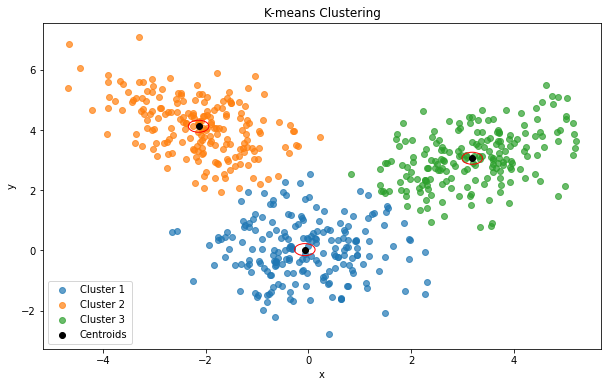

In [6]:
# Evaluation Cell

# Load the data from the file
X = load_data('Image.csv').astype(float)
# Set the value of K
K = 3
# Cluster the data using K-means
M, U = kmeans(X, K)
# Plot the data and the centroids
plot_clusters(X, M, U)

 Analyze the results of the K-means-LSE clustering. How well do they match the underlying distributions? What are the advantages and disadvantages of this method? ``(5 pt.)``

<font color="yellow"> Advantages:

- Fast Convergence: K-means-LSE tends to converge quickly, making it computationally efficient for large datasets.
- Simplicity: The algorithm is relatively simple and easy to implement.

Disadvantages:

- Sensitive to Initialization: K-means is sensitive to the initial placement of centroids. Different initializations may lead to different final clusters.
- Assumption of Circular Clusters: K-means assumes that clusters are spherical and equally sized. This might not be suitable for non-uniformly distributed or elliptical clusters.
- Sensitive to Outliers: Outliers can significantly impact the centroids, as the algorithm minimizes the sum of squared distances. One outlier can disproportionately influence the
centroid's position.
- Fixed Number of Clusters: The algorithm requires specifying the number of clusters (K) beforehand, which might not always be known in real-world applications</yellow>

- Part 4: Write a Python function called **elbow_method** that takes **X** and a list of possible values for **K** as inputs and returns a numpy vector **S** of the same size as the list. **S** should contain the **sum of squared errors (SSE)** for each value of **K**, where the SSE is defined as the sum of the squared distances between each point and its assigned centroid. Plot **S** versus **K** and use the **elbow method** to find the best value of **K** for the data. Explain your reasoning and show your work. ``(15 pt.)``

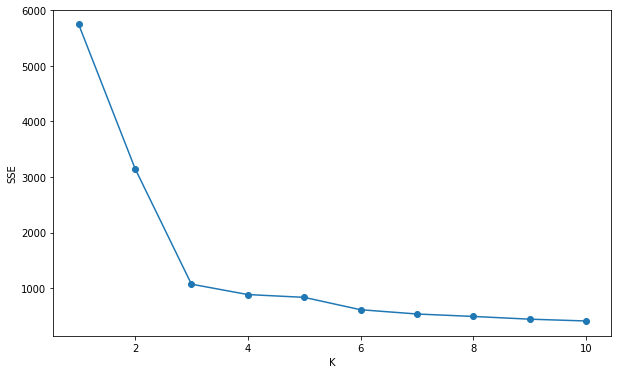

In [7]:
def elbow_method(X, K_list):
    S = []
    for K in K_list:
        M, U = kmeans(X, K)
        temp = 0
        for i in range(U.shape[0]):
            centroid = M[np.where(U[i] == 1)[0]]
            dis = np.linalg.norm(X[i]-centroid)
            temp = temp + (dis ** 2)
        S.append(temp)
    plt.figure(figsize=(10,6))
    plt.plot(K_list, S, marker='o')
    plt.xlabel('K')
    plt.ylabel('SSE')
    plt.show()
    S = np.array(S)

    return S

# the rest of the code...

K_list = [1,2,3,4,5,6,7,8,9,10]
elbow_method(X, K_list);

# 3. Sentiment Analysis using Linear Regression

### Introduction
Sentiment analysis is a technique used to determine the sentiment or opinion expressed in text data. In this assignment, we will explore the application of linear regression for sentiment analysis on a dataset of movies reviews. The goal is to build a model that can predict the sentiment score of new text documents based on the extracted features.

**Note: In this question, feel free to use built-in functions implemented in different python packages. One of the goals of this question is to make you familiar with using built-in functions in python**

### Import required packages and libraries

Make sure you have installed all of the following packages before.

Use the following command in terminal for installing packages.
```
pip install [package_name]
```

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import copy

### Load and Inspect the Dataset

Load the "sentiment.csv" dataset and follow the instructions below:
1. Display the first 25 rows and its last 10 rows of the dataset.
2. Print the information about all columns of data frame.
3. plot the histogram of the sentiments scores.

``(5 pt.)``

In [113]:
# TODO: First 25 rows of the dataset
X = load_data('sentiment.csv')
print(X[1:26])

[['1' '1'
  'A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .'
  '1']
 ['2' '1'
  'A series of escapades demonstrating the adage that what is good for the goose'
  '2']
 ['3' '1' 'A series' '2']
 ['4' '1' 'A' '2']
 ['5' '1' 'series' '2']
 ['6' '1'
  'of escapades demonstrating the adage that what is good for the goose'
  '2']
 ['7' '1' 'of' '2']
 ['8' '1'
  'escapades demonstrating the adage that what is good for the goose' '2']
 ['9' '1' 'escapades' '2']
 ['10' '1' 'demonstrating the adage that what is good for the goose' '2']
 ['11' '1' 'demonstrating the adage' '2']
 ['12' '1' 'demonstrating' '2']
 ['13' '1' 'the adage' '2']
 ['14' '1' 'the' '2']
 ['15' '1' 'adage' '2']
 ['16' '1' 'that what is good for the goose' '2']
 ['17' '1' 'that' '2']
 ['18' '1' 'what is good for the goose' '2']
 ['19' '1' 'what' '2']
 ['20' '1' 'is good for the goose' '2

In [11]:
# TODO: Last 10 rows of the dataset
print(X[ X.shape[0]-10 : X.shape[0]])

[['9991' '419' 'this a comedy or serious drama' '2']
 ['9992' '419' 'a comedy or serious drama' '2']
 ['9993' '419' 'a comedy or' '2']
 ['9994' '419' 'a comedy' '2']
 ['9995' '419' 'serious drama' '2']
 ['9996' '420'
  'plays like some corny television production from a bygone era' '1']
 ['9997' '420' 'plays like some corny television' '1']
 ['9998' '420' 'like some corny television' '2']
 ['9999' '420' 'some corny television' '1']
 ['10000' '420' 'corny television' '1']]


In [116]:
# TODO: information of columns 
print(f"Number of columns : {X.shape[1]}")
print(f"Number of data : {X.shape[0]-1}")
print(f"Columns title : {X[0,0]},{X[0,1]},{X[0,2]},{X[0,3]}")
print(f"Columns data type : {type(X[1,0])},{type(X[1,1])},{type(X[1,2])},{type(X[1,3])}")

Number of columns : 4
Number of data : 10000
Columns title : PhraseId,SentenceId,Phrase,Sentiment
Columns data type : <class 'numpy.str_'>,<class 'numpy.str_'>,<class 'numpy.str_'>,<class 'numpy.str_'>


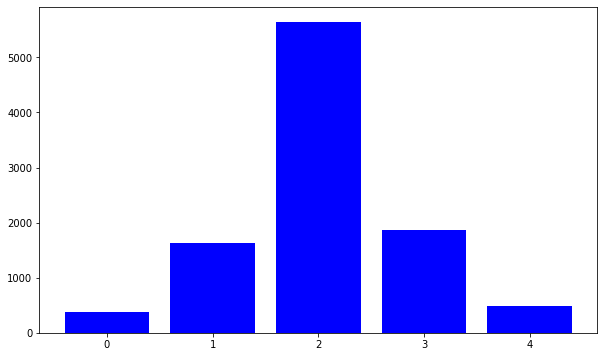

In [13]:
# TODO: histogram of sentiment scores

scores = X[1:, 3].astype(int)
unique_values, counts = np.unique(scores, return_counts=True)
plt.figure(figsize=(10,6))
plt.bar(unique_values, counts, color='blue')
plt.show()


Each sample contains a sentence or phrase which is a review comment about a movie, with is corresponding sentiment score which can be the following:
- 0 : negative
- 1 : somehow negative
- 2 : neutral
- 3 : somehow positive
- 4 : positive

### Preprocess the text data
In order to prepare our text data for regression analysis, we have to follow these steps:
1. Convert all text and words into lowercase
2. Removing punctuation marks such as exclamation marks, question marks, etc.
3. Creating a list of stop-words. Stop words are words that are frequently used in a language but typically do not carry significant meaning or contribute much to the sentiment of a sentence e.g. 'and', 'the', 'is', etc. **(Hint: use "re" package)**
4. Break down the text into individual words or tokens. Tokenization is a fundamental step that helps in analyzing the text at a granular level.

Comlpete the **"preprocess_text(text)"** function on the following code cell.

``(5 pt.)``

In [15]:
def preprocess_text(text):
    
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    text = ' '.join(filtered_tokens)
    
    return text

In [16]:
# TODO: Apply the preprocessing function to the text column
for i in range(X.shape[0]-1):
    X[i+1,2] = preprocess_text(X[i+1,2])

print(X)

[['PhraseId' 'SentenceId' 'Phrase' 'Sentiment']
 ['1' '1'
  'series escapades demonstrating adage good goose also good gander occasionally amuses none amounts much story'
  '1']
 ['2' '1' 'series escapades demonstrating adage good goose' '2']
 ...
 ['9998' '420' 'like corny television' '2']
 ['9999' '420' 'corny television' '1']
 ['10000' '420' 'corny television' '1']]


### Feature extraction
Feature extraction involves converting the processed text data into a format suitable for input to a machine learning model. The goal is to represent the text data in a way that captures relevant information for sentiment analysis.

Surf the net for the **"Bag-of-Words" (BoW)** technique. In a markdown cell explain this method and discuss how python built-in functions implement it.

Based on what you learned, extract the features.

``(10 pt.)``

## <font color="red"> TODO : discuss BoW method </font>

<font color="yellow">The Bag of Words (BoW) model is a popular technique used in natural language processing and information retrieval for representing text data. The fundamental idea behind BoW is to convert a piece of text into a numerical vector by counting the frequency of each word in the text. It's called "Bag of Words" because the order and structure of words are disregarded, and only the occurrence of words matters.

Here are the main steps involved in creating a Bag of Words representation:

- Tokenization:
The first step is to break down the text into individual words or tokens. This process is called tokenization. Tokens are usually words, but they can also be phrases or other meaningful units.

- Vocabulary Building:
Create a vocabulary by listing all unique words (or tokens) from the entire dataset. Each unique word in the vocabulary is assigned a unique index.

- Counting:
For each document in the dataset, count the number of times each word in the vocabulary appears. This results in a numerical vector representing the frequency of each word in the document.

- Sparse Representation:
Since most documents use only a small subset of the entire vocabulary, the resulting vectors are often sparse (contain mostly zeros). This is a sparse representation of the text.

- Normalization (optional):
It's common to normalize the count values by dividing each count by the total number of words in the document or using other normalization techniques.
Here's a simple example to illustrate the process:
Consider two sentences:
Sentence 1: "The cat in the hat."
Sentence 2: "The cat with the hat."
The vocabulary is: ["The", "cat", "in", "the", "hat", "with"]
The Bag of Words representation:
Sentence 1: [1, 1, 1, 1, 1, 0]
Sentence 2: [1, 1, 0, 1, 1, 1]
In these vectors, each element corresponds to the count of the corresponding word in the vocabulary.
Advantages of Bag of Words:
Simple and easy to understand.
Captures the occurrence of words in a document.
Works well for many text classification tasks.

- Limitations of Bag of Words:
Ignores the order of words (no sequential information).
Treats each word independently.
Can result in high-dimensional and sparse vectors.
Does not capture semantic meaning well.
Despite its limitations, the Bag of Words model serves as the foundation for more advanced text representation techniques, such as TF-IDF and word embeddings.</yellow>

In [17]:
# TODO: Extract features from the preprocessed text data

documents = X[ 1: , 2]
vectorizer = CountVectorizer()
Y = vectorizer.fit_transform(documents)
vocabulary = vectorizer.get_feature_names_out()
dense_matrix = Y.toarray()

print("BoWs:")
print(dense_matrix)
print("\nVocabulary:")
print(vocabulary)

BoWs:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Vocabulary:
['10' '100' '100minute' ... 'zhuangzhuang' 'zingers' 'zip']


### Regression model

1. Split the dataset into training and testing sets using an appropriate ratio.
2. Train and fit a linear regression model to the train data
3. Evaluate the model's performance on the testing set. Calculate suitable evaluation metrics, such as mean squared error (MSE) 

**Note: Feel free to use built-in functions for this section**

``(5 pt.)``

In [25]:
# TODO: Split the dataset into training and testing sets
dense = copy.copy(dense_matrix)
temp = copy.copy(np.array(X[1: , 3], dtype=float))
X_train, X_test, y_train, y_test = train_test_split(dense, temp, test_size=0.25)

# TODO: Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# TODO: Make predictions on the testing set
y_pred = model.predict(X_test)

# TODO: Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)

# Display the results
print( f"MSE: {mse}")

MSE: 1.9138642802657182e+25


### Visualization

Visualize and scatter plot the actual vs. predicted sentiment scores for the model. Briefly interpret the results in a markdown cell.

``(5 pt.)``

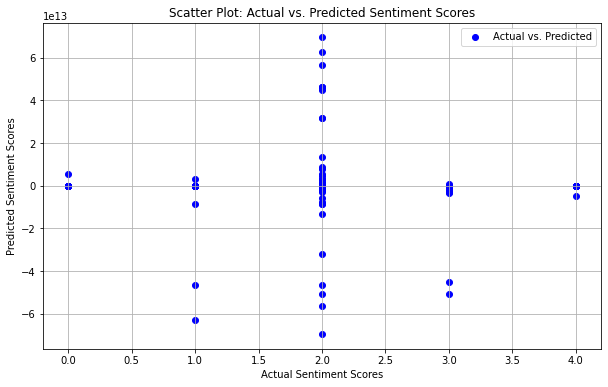

In [33]:
plt.figure(figsize=(10,6))
plt.scatter(y_test , y_pred, color='blue', label='Actual vs. Predicted')
plt.xlabel('Actual Sentiment Scores')
plt.ylabel('Predicted Sentiment Scores')
plt.title('Scatter Plot: Actual vs. Predicted Sentiment Scores')
plt.legend()
plt.grid(True)
plt.show()

## <font color="red"> Discuss the resulted figure </font>
<font color="yellow">
As wee see most of the prdeictions matches the reality but there are some cases that predections have a signifant error. Most of the wrong predictions happen when the sentiment score is 2 .
</yellow>


In the previous section you extracted the features using sklearn built-in function. In this section you are asked to implement and create the feature matrix from scratch.

``(10 pt.)``

In [ ]:
vocab = []
a = ['s','a']
b = ['s','d']
for sentence in X[1:, 2] :
    temp = sentence.split()
    vocab = np.unique(np.append(vocab,temp))

for i in range(X[1:, 2].shape[0]) :
    tempraw = np.zeros( (vocab.shape[0]) )
    t = np.array(X[i+1,2].split(' '))
    print(i)
    for j in range( t.shape[0] ):
        tempsent = copy.copy(X[i+1,2])
        f = tempsent.count(t[j])
        tempsent = tempsent.replace(t[j], '')
        tempraw[np.where(vocab == t[j])[0]] = f
        if ( i == 0 ) :
            Mat = tempraw
    Mat = np.vstack( (Mat, tempraw) )

print(Mat)

##It takes 4 minutes !
